In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape,GaussianNoise
from tensorflow.keras.optimizers import SGD

## Data Loading and Preprocessing

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

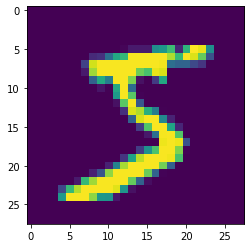

In [8]:
plt.imshow(X_train[0])

In [9]:
X_train = X_train / 255.
X_test = X_test / 255.

## Model

In [11]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [12]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [13]:
autoencoder = Sequential([encoder,decoder])

autoencoder.compile(loss='binary_crossentropy',
                    optimizer=SGD(lr=1.5),
                    metrics=['accuracy'])

In [14]:
autoencoder.fit(X_train,X_train,epochs=5,
                validation_data=[X_test,X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 27s 450us/sample - loss: 0.2487 - accuracy: 0.7917 - val_loss: 0.2121 - val_accuracy: 0.7944
Epoch 2/5
60000/60000 [==============================] - 23s 383us/sample - loss: 0.1826 - accuracy: 0.7979 - val_loss: 0.1651 - val_accuracy: 0.8023
Epoch 3/5
60000/60000 [==============================] - 23s 391us/sample - loss: 0.1554 - accuracy: 0.8029 - val_loss: 0.1491 - val_accuracy: 0.8010
Epoch 4/5
60000/60000 [==============================] - 23s 383us/sample - loss: 0.1458 - accuracy: 0.8045 - val_loss: 0.1421 - val_accuracy: 0.8040
Epoch 5/5
60000/60000 [==============================] - 23s 382us/sample - loss: 0.1407 - accuracy: 0.8055 - val_loss: 0.1385 - val_accuracy: 0.8058


In [15]:
passed_image = autoencoder.predict(X_test[:10]) 

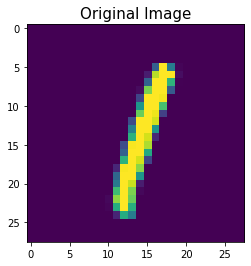

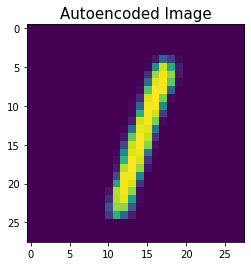

In [25]:
n = 5

plt.imshow(X_test[n])
plt.title('Original Image',fontsize=15)
plt.show()

plt.imshow(passed_image[n])
plt.title('Autoencoded Image',fontsize=15)
plt.show()

## Noise Removal

In [27]:
sample = GaussianNoise(0.2)
noisey = sample(X_test[:10],training=True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



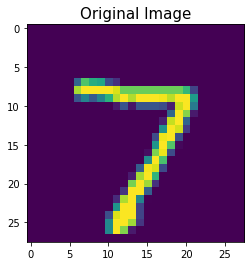

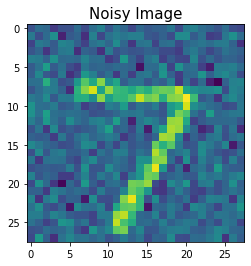

In [29]:
n = 0

plt.imshow(X_test[n])
plt.title('Original Image',fontsize=15)
plt.show()

plt.imshow(noisey[n])
plt.title('Noisy Image',fontsize=15)
plt.show()

In [31]:
tf.random.set_seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [32]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [33]:
noise_remove = Sequential([encoder,decoder])
noise_remove.compile(loss='binary_crossentropy',
                     optimizer='adam',metrics=['accuracy'])

In [34]:
noise_remove.fit(X_train,X_train,
                 epochs=8)

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 29s 476us/sample - loss: 0.1716 - accuracy: 0.8007
Epoch 2/8
60000/60000 [==============================] - 25s 410us/sample - loss: 0.1289 - accuracy: 0.8082
Epoch 3/8
60000/60000 [==============================] - 25s 417us/sample - loss: 0.1206 - accuracy: 0.8096
Epoch 4/8
60000/60000 [==============================] - 25s 420us/sample - loss: 0.1150 - accuracy: 0.8106
Epoch 5/8
60000/60000 [==============================] - 25s 409us/sample - loss: 0.1112 - accuracy: 0.8112
Epoch 6/8
60000/60000 [==============================] - 25s 412us/sample - loss: 0.1084 - accuracy: 0.8116
Epoch 7/8
60000/60000 [==============================] - 26s 437us/sample - loss: 0.1061 - accuracy: 0.8119
Epoch 8/8
60000/60000 [==============================] - 27s 447us/sample - loss: 0.1042 - accuracy: 0.8122


In [35]:
noisy_images = sample(X_test[:10],training=True) 
denoised_images = noise_remove(noisy_images)

ORIGINAL IMAGE


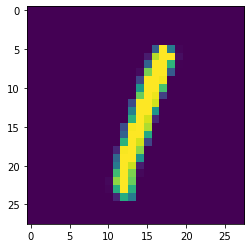

NOISY ADDED IMAGE


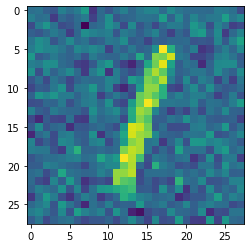

NOISE REMOVAL


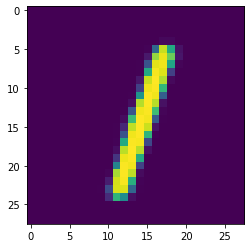

In [38]:
n = 5
print('ORIGINAL IMAGE')
plt.imshow(X_test[n])
plt.show()

print('NOISY ADDED IMAGE')
plt.imshow(noisy_images[n])
plt.show()

print('NOISE REMOVAL')
plt.imshow(denoised_images[n])
plt.show()